# Project 1
## Francis Jose Patron Fidalgo (802180833)
## CIIC 5018 sec: 060

In [1]:
import string
import matplotlib.pyplot as plt

In [2]:
letter2num = dict(zip(string.ascii_uppercase, range(0, 26)))
num2letter = {v: k for k, v in letter2num.items()}

In [3]:
def prepare_text(input_txt: str) -> str:
    return ''.join([c.upper() for c in input_txt if c.isalpha()])

## Caesar Encryption Algorithm

In [4]:
def encrypt(plain_txt: str, cypher_key: int) -> str:
    # convert to only uppercase english letters
    processed_txt = prepare_text(plain_txt)
    # convert to numbers
    input_nums = [letter2num[letter] for letter in processed_txt]
    # shift numbers with cypher key
    cypher_nums = [(num + cypher_key) % 26 for num in input_nums]
    # convert back to uppercase english letters
    cypher_text = ''.join([num2letter[num] for num in cypher_nums])
    return cypher_text

## Caesar Decryption Algorithm

In [5]:
def decrypt(cypher_txt: str, cypher_key: int) -> str:
    # convert to numbers
    cypher_nums = [letter2num[letter.upper()] for letter in cypher_txt]
    # shift numbers with cypher key
    text_nums = [(num - cypher_key) % 26 for num in cypher_nums]
    # convert back to english letters to get original message
    plain_txt = ''.join([num2letter[num] for num in text_nums])
    return plain_txt

## Letter Frequency

In [6]:
def get_letter_freq(text: str) -> map:
    # convert to only uppercase english letters
    plain_text = prepare_text(text)
    # create map that contains all letters & the times repeated in the text, start all at 0
    letter_freq = dict(zip(string.ascii_uppercase, [0]*len(string.ascii_uppercase)))
    # iterate over the text
    for letter in plain_text:
        # add 1 to the frequencies map
        letter_freq[letter] += 1
    # convert to relative frequency %
    total_letters = sum(letter_freq.values())
    for letter, freq in letter_freq.items():
        letter_freq[letter] = round(freq/total_letters * 100, 3)
    return letter_freq

In [7]:
def generate_bar_plot(letter_freq: map):
    letters = letter_freq.keys()
    frequency = letter_freq.values()
    # create bar plot
    plt.figure(figsize = (20, 10))
    bars = plt.bar(letters, frequency, color ='gray', width = 0.5)
    plt.xlabel("Letters (A-Z)")
    plt.ylabel("Relative Frequency %")
    plt.title("Relative Frequency of Letters in English Text")

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + 0.05, yval)

    plt.show()

## test #1: Text Processing.
make sure we can remove everything but english letters and switch to uppercase if needed

In [8]:
test_str = 'attack_the*enemy/?>base:"at@#$twentythreehu$^@(ndred$@using!!!!the12234235east_+entrance.?'
output = prepare_text(test_str)
print(f'TEST STRING: {test_str}\nOUTPUT (ONLY UPPERCASE ENGLISH LETTERS): {output}')

TEST STRING: attack_the*enemy/?>base:"at@#$twentythreehu$^@(ndred$@using!!!!the12234235east_+entrance.?
OUTPUT (ONLY UPPERCASE ENGLISH LETTERS): ATTACKTHEENEMYBASEATTWENTYTHREEHUNDREDUSINGTHEEASTENTRANCE


## test #2: Caesar Encrypting
test for the ecrypting function   
plain text: `attack the enemy base at twentythree hundred using the east entrance.`   
expected cypher text: `RKKRTBKYVVEVDPSRJVRKKNVEKPKYIVVYLEUIVULJZEXKYVVRJKVEKIRETV`

In [9]:
test_str = 'attack the enemy base at twentythree hundred using the east entrance.'
cypher_key = 17
print(f'ENCRYPTING MESSAGE: {test_str}\nCYPHER_KEY: {cypher_key}')
cypher_text = encrypt(test_str, cypher_key)
print(f'CYPHER TEXT: {cypher_text}')

ENCRYPTING MESSAGE: attack the enemy base at twentythree hundred using the east entrance.
CYPHER_KEY: 17
CYPHER TEXT: RKKRTBKYVVEVDPSRJVRKKNVEKPKYIVVYLEUIVULJZEXKYVVRJKVEKIRETV


## test #3: Caesar Decrypting
text for the decrypting function   
cypher_text: `RKKRTBKYVVEVDPSRJVRKKNVEKPKYIVVYLEUIVULJZEXKYVVRJKVEKIRETV`   
expected plain text: `ATTACKTHEENEMYBASEATTWENTYTHREEHUNDREDUSINGTHEEASTENTRANCE`


In [10]:
print(f'DECRYPTING MESSAGE: {cypher_text}\nCYPHER_KEY: {cypher_key}')
plain_text = decrypt(cypher_text, cypher_key)
print(f'PLAIN TEXT: {plain_text}')

DECRYPTING MESSAGE: RKKRTBKYVVEVDPSRJVRKKNVEKPKYIVVYLEUIVULJZEXKYVVRJKVEKIRETV
CYPHER_KEY: 17
PLAIN TEXT: ATTACKTHEENEMYBASEATTWENTYTHREEHUNDREDUSINGTHEEASTENTRANCE


## test #4: Letter Frequency
Use the provided project description text as input & plot the results.

letter  frequency (%)
-----------------
  A    |   5.235
  B    |   1.227
  C    |   4.54
  D    |   3.845
  E    |   12.883
  F    |   2.372
  G    |   1.677
  H    |   3.926
  I    |   7.812
  J    |   0.286
  K    |   0.532
  L    |   3.722
  M    |   1.513
  N    |   7.812
  O    |   7.975
  P    |   3.149
  Q    |   0.368
  R    |   5.521
  S    |   5.235
  T    |   10.552
  U    |   4.908
  V    |   0.941
  W    |   0.736
  X    |   0.573
  Y    |   2.536
  Z    |   0.123


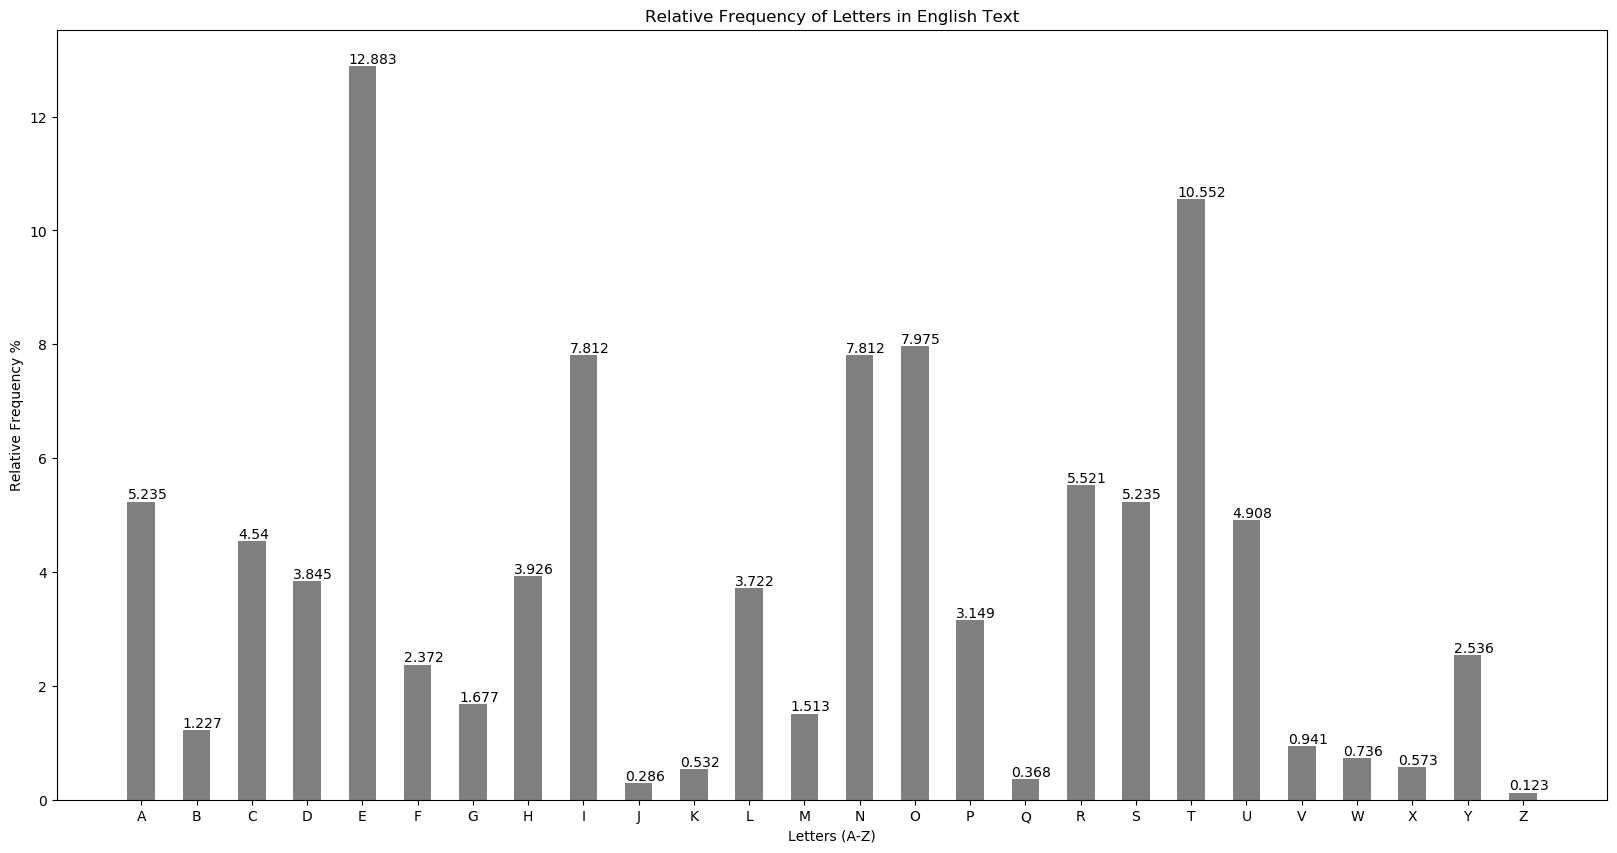

In [11]:
text = '''CIIC5018 / ICOM5018
Network Security and Cryptography
Project 1: Basics of Ciphers
Overview
In this project, you will need to design and implement some basic functions,
including text processing, Caesar cipher (encryption and decryption), and
frequency of a single letter. The programming language is Python.
Document requirements
To work on the project, you will need to prepare three documents following the
guidelines below.
1. A design document
a. Cover page
i. It shall include the title of the document, your name, student
ID, department and university information, etc.
b. Table of content
c. Section 1: A text processing procedure
i. The input is a string
ii. The output is a string that contains only English letters, each
of which must be capitalized
d. Section 2: The main ideas and pseudo code of the Caesar encryption
i. The inputs include a plaintext and a key
1. The plaintext must be the output of the procedure
described in section 1
ii. The return is a ciphertext
e. Section 3: The main ideas and pseudo code of the Caesar decryption
i. The inputs include a ciphertext and a key
ii. The return is a plaintext
f. Section 4: The pseudo code to determine the frequency of a single
letter in a string
i. The input is a string that contains only capitalized English
letters
ii. The output is an array of letter frequency
g. References
i. Cite at least 5 references
ii. The link to your YouTube video must be included here
2. A Python program saved in a Jupyter notebook
a. Download and install the latest version of Python.
b. Install Jupyter notebook for Python.
c. All implementation shall be included in one notebook.
d. The following functions shall be implemented based on the pseudo
codes in the design document:
i. The text processing function.
ii. The Caesar encryption function.
iii. The Caesar decryption function.
iv. The letter frequency function.
v. Some testing functions.
e. To verify your encryption and decryption functions, you must show
that the plaintext can be accurately recovered after you used the
same key to encrypt and decrypt
f. To show the result of your letter frequency function. You shall use all
the text in this Word document as the input of the text processing
procedure, then use the output of the text processing procedure as
the input of the frequency detection function, finally you shall plot a
figure for frequency (similar to Figure 2.5 in the textbook) in
Python.
3. A YouTube video to walk through your code
a. Download and install the latest version of OBS studio.
b. Use OBS studio to record the screen along with your voice for
explanation.
c. In the video, you shall go through Step 2.e to verify your encryption
and decryption function.
d. In the video, you shall go through Step 2.f and show the figure of
frequency.
e. Upload the video to YouTube, set the video as private, then share it
to me (Kejie.Lu@upr.edu)
Submission
Submit a single zip file that includes:
1. the design document
2. the Jupyter notebook
Evaluation
1. Rubrics are used in the evaluation.
2. You must carefully review all rubrics before preparing for the documents.'''

letter_freq = get_letter_freq(text)
# print the results 
print('letter  frequency (%)\n-----------------')
for letter, freq in letter_freq.items():
    print(f'  {letter}    |   {freq}')
# plot results
generate_bar_plot(letter_freq)

## Test #5: Cracking Caesar Cypgher With Letter Frequency

letter  frequency (%)
-----------------
  A    |   0.368
  B    |   5.521
  C    |   5.235
  D    |   10.552
  E    |   4.908
  F    |   0.941
  G    |   0.736
  H    |   0.573
  I    |   2.536
  J    |   0.123
  K    |   5.235
  L    |   1.227
  M    |   4.54
  N    |   3.845
  O    |   12.883
  P    |   2.372
  Q    |   1.677
  R    |   3.926
  S    |   7.812
  T    |   0.286
  U    |   0.532
  V    |   3.722
  W    |   1.513
  X    |   7.812
  Y    |   7.975
  Z    |   3.149


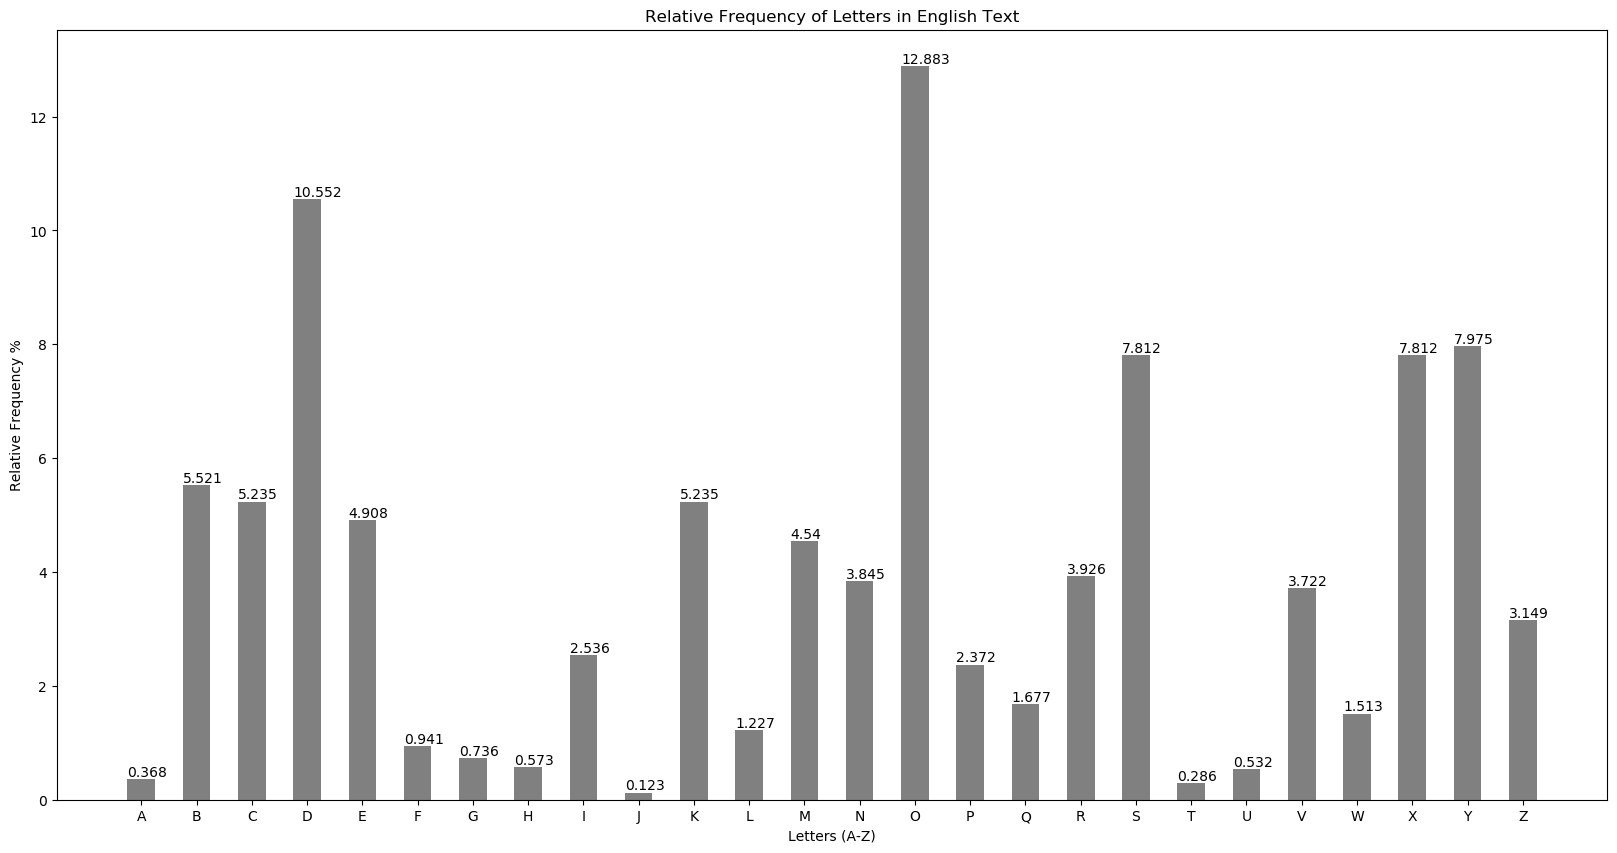

In [12]:
# encrypt the text
encrypted_text = encrypt(text, 10) # key is 10
letter_freq = get_letter_freq(encrypted_text)
# print the results 
print('letter  frequency (%)\n-----------------')
for letter, freq in letter_freq.items():
    print(f'  {letter}    |   {freq}')
# plot results
generate_bar_plot(letter_freq)